In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-03-29 08:13:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-29 08:13:32 (77.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2022-03-28 04:51:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 74.125.132.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   160MB/s    in 1.0s    

2022-03-28 04:51:29 (160 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf

IMG_SIZE = (224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=32,
                                                                 label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                
                                                                label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.53801025e+02 2.53341827e+02 1.65872452e+02]
   [2.50974487e+02 2.50663254e+02 1.57836731e+02]
   [2.52561218e+02 2.52581635e+02 1.55357147e+02]
   ...
   [2.54000000e+02 2.54000000e+02 1.80989761e+02]
   [2.54000000e+02 2.55000000e+02 1.76806091e+02]
   [2.54000000e+02 2.55000000e+02 1.72642822e+02]]

  [[2.50505096e+02 2.38025497e+02 1.43045914e+02]
   [2.47367340e+02 2.35795914e+02 1.36224472e+02]
   [2.53418365e+02 2.40943878e+02 1.38704086e+02]
   ...
   [2.53000000e+02 2.54000000e+02 1.74285706e+02]
   [2.53000000e+02 2.54000000e+02 1.74000000e+02]
   [2.53000000e+02 2.55000000e+02 1.72000000e+02]]

  [[2.49153061e+02 2.25862244e+02 1.23234695e+02]
   [2.44244888e+02 2.18816315e+02 1.15500000e+02]
   [2.45020416e+02 2.20331635e+02 1.14117348e+02]
   ...
   [2.52785721e+02 2.55000000e+02 1.67500046e+02]
   [2.52785721e+02 2.54785721e+02 1.71586731e+02]
   [2.52785721e+02 2.53785721e+02 1.73938797e+02]]

  ...

  [[1.47729507e+02 6.84488831e+01 1.89787471e+00]
   [1

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average')(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=(int(0.25*len(test_data))),
                        callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

16719872/16705208 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20220328-045139
Epoch 1/5
24/24 [==============================] - 28s 441ms/step - loss: 1.9556 - accuracy: 0.3533 - val_loss: 1.3774 - val_accuracy: 0.6612
Epoch 2/5
24/24 [==============================] - 7s 266ms/step - loss: 1.1874 - accuracy: 0.7213 - val_loss: 0.9388 - val_accuracy: 0.7714
Epoch 3/5
24/24 [==============================] - 7s 265ms/step - loss: 0.8569 - accuracy: 0.8013 - val_loss: 0.7648 - val_accuracy: 0.8240
Epoch 4/5
24/24 [==============================] - 7s 267ms/step - loss: 0.7023 - accuracy: 0.8320 - val_loss: 0.6702 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 9s 358ms/step - loss: 0.6102 - accuracy: 0.8520 - val_loss: 0.6211 - val_accuracy: 0.8569


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average (GlobalAvera  (None, 1280)             0         
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


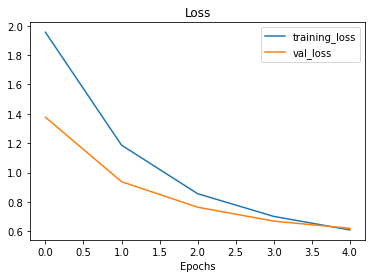

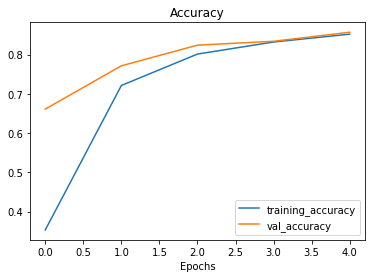

In [ ]:
plot_loss_curves(history_0)

In [ ]:
input_shape = (1,4,4,3)

tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")



Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2022-03-29 04:24:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.107.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   166MB/s    in 0.8s    

2022-03-29 04:24:41 (166 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'

In [ ]:
import tensorflow as tf

IMG_SIZE = (224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size = IMG_SIZE,
                                                                           batch_size=32,
                                                                           label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.models.Sequential([
              preprocessing.RandomFlip('horizontal'),
              preprocessing.RandomRotation(0.2),
              preprocessing.RandomZoom(0.2),
              preprocessing.RandomHeight(0.2),
              preprocessing.RandomWidth(0.2)                               
], name='data_augmentation')

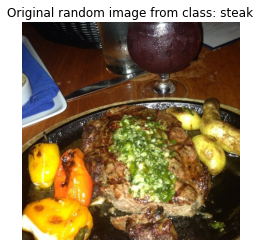

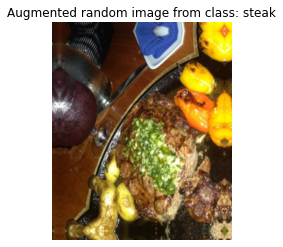

In [ ]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) 
target_dir = "10_food_classes_1_percent/train/" + target_class 
random_image = random.choice(os.listdir(target_dir)) 
random_image_path = target_dir + "/" + random_image 
img = mpimg.imread(random_image_path) 
plt.imshow(img) 
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); 

augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) 
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape = input_shape, name='input_layers')

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name='global_average_pooling')(x)

outputs = layers.Dense(len(train_data_1_percent.class_names), activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25* len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220329-042500
Epoch 1/5
3/3 [==============================] - 20s 2s/step - loss: 2.2458 - accuracy: 0.1857 - val_loss: 2.1460 - val_accuracy: 0.2319
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 1.9989 - accuracy: 0.3429 - val_loss: 2.0519 - val_accuracy: 0.2747
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.8672 - accuracy: 0.4429 - val_loss: 1.9291 - val_accuracy: 0.3766
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7205 - accuracy: 0.6286 - val_loss: 1.8562 - val_accuracy: 0.4359
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.5144 - accuracy: 0.7571 - val_loss: 1.7663 - val_accuracy: 0.4786


In [ ]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 7s 77ms/step - loss: 1.7743 - accuracy: 0.4740


[1.7742558717727661, 0.4740000069141388]

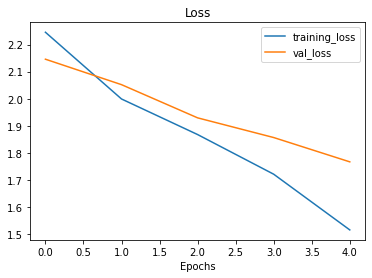

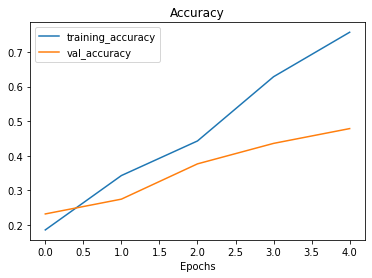

In [ ]:
plot_loss_curves(history_1)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

--2022-03-29 08:13:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   138MB/s    in 1.2s    

2022-03-29 08:13:43 (138 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
import tensorflow as tf

IMG_SIZE = (224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

data_augmentation = tf.keras.models.Sequential([
                  preprocessing.RandomFlip('horizontal'),
                  preprocessing.RandomZoom(0.2),
                  preprocessing.RandomWidth(0.2),
                  preprocessing.RandomHeight(0.2),
                  preprocessing.RandomRotation(0.2)                             
], name='data_augmentation')

input_shape = (224, 224, 3)

inputs = layers.Input(input_shape, name="input_layers")

x = data_augmentation(inputs)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name = 'global_average')(x)

outputs = layers.Dense(len(train_data_10_percent.class_names), activation='softmax', name='output_layer')(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
checkpoint_path = "ten_percent_weights_checkpoint/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = 'epoch',
                                                         verbose=1)

In [ ]:
initial_epochs = 5
history_10_data = model_2.fit(train_data_10_percent,
                        epochs = initial_epochs,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220329-081409
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9976 - accuracy: 0.3133
Epoch 1: saving model to ten_percent_weights_checkpoint/checkpoint.ckpt
24/24 [==============================] - 39s 879ms/step - loss: 1.9976 - accuracy: 0.3133 - val_loss: 1.4670 - val_accuracy: 0.6398
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3788 - accuracy: 0.6640
Epoch 2: saving model to ten_percent_weights_checkpoint/checkpoint.ckpt
24/24 [==============================] - 19s 742ms/step - loss: 1.3788 - accuracy: 0.6640 - val_loss: 1.0944 - val_accuracy: 0.7270
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0840 - accuracy: 0.7227
Epoch 3: saving model to ten_percent_weights_checkpoint/checkpoint.ckpt
24/24 [==============================] - 16s 654ms/step - loss: 1.0840 - accuracy: 0.7227 - val_loss: 0.8983 - val_accuracy: 0.7714
Epoch 4/5
24/24 [=====

In [ ]:
results_10_percent = model_2.evaluate(test_data)
results_10_percent

79/79 [==============================] - 6s 72ms/step - loss: 0.7125 - accuracy: 0.8144


[0.7125349640846252, 0.8144000172615051]

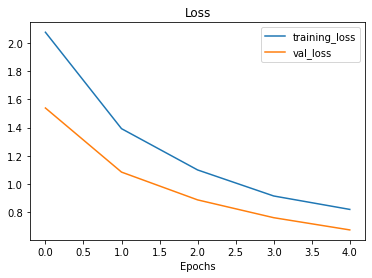

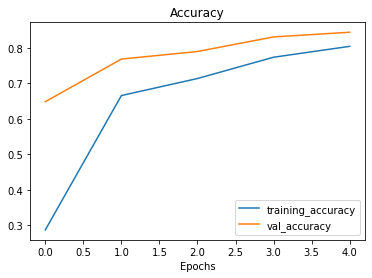

In [ ]:
plot_loss_curves(history_10_data)

In [ ]:
model_2.load_weights(checkpoint_path)

loaded_result = model_2.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.7125 - accuracy: 0.8144


In [ ]:
results_10_percent == loaded_result

False

In [ ]:
import numpy as np

np.isclose(np.array(results_10_percent), np.array(loaded_result))

array([ True,  True])

In [ ]:
print(np.array(np.array(results_10_percent) - np.array(loaded_result)))

[-1.1920929e-07  0.0000000e+00]


In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer.trainable)

True
True
False
True
True


In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average (GlobalAvera  (None, 1280)             0         
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                metrics = ['accuracy'])  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
fine_tune_epochs = initial_epochs+5


history_fine_10_percent_aug = model_2.fit(train_data_10_percent,
                                          epochs = fine_tune_epochs,
                                          validation_data = test_data,
                                          initial_epoch = history_10_data.epoch[-1],
                                          validation_steps = int(0.25*len(test_data)),
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220329-081655
Epoch 5/10
24/24 [==============================] - 27s 668ms/step - loss: 0.7021 - accuracy: 0.7947 - val_loss: 0.6037 - val_accuracy: 0.8076
Epoch 6/10
24/24 [==============================] - 12s 498ms/step - loss: 0.5612 - accuracy: 0.8080 - val_loss: 0.5806 - val_accuracy: 0.8141
Epoch 7/10
24/24 [==============================] - 13s 532ms/step - loss: 0.5015 - accuracy: 0.8480 - val_loss: 0.5522 - val_accuracy: 0.8191
Epoch 8/10
24/24 [==============================] - 13s 544ms/step - loss: 0.4553 - accuracy: 0.8627 - val_loss: 0.5576 - val_accuracy: 0.8289
Epoch 9/10
24/24 [==============================] - 12s 499ms/step - loss: 0.4198 - accuracy: 0.8693 - val_loss: 0.5671 - val_accuracy: 0.8092
Epoch 10/10
24/24 [==============================] - 14s 581ms/step - loss: 0.3691 - accuracy: 0.8933 - val_loss: 0.5150 - val_accuracy: 0.8339


In [ ]:
results_fine_tune